In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

In [ ]:
pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle

In [3]:
#pd.set_option('display.max_columns', 50)
#plt.style.use('bmh')
#color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
#color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [4]:
calendar = pd.read_csv('C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/calendar.csv')
price = pd.read_csv("C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/sell_prices.csv")
s_train = pd.read_csv("C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/sales_train_validation.csv")
sample = pd.read_csv("C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/sample_submission.csv")

In [5]:
d_cols = [c for c in s_train.columns if 'd_' in c]
print(d_cols)

['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', 'd_116', 'd_117', 'd_118', 'd_119', 'd_120', 'd_121', 'd_122', 'd_123', 

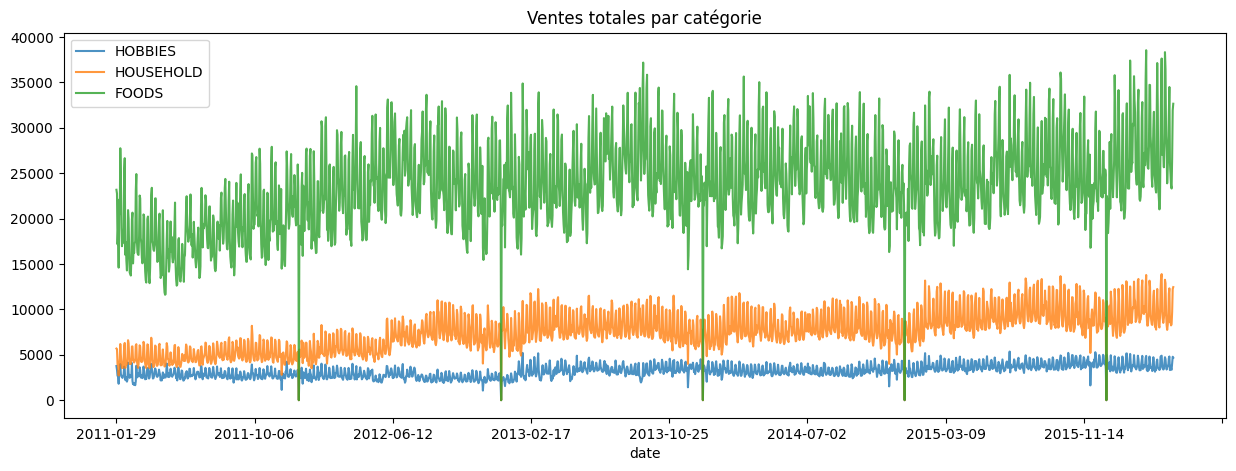

In [6]:
past_sales=s_train.set_index('id')[d_cols]\
.T\
.merge(calendar.set_index('d')['date'],
       left_index=True,
       right_index=True,
       validate='1:1')\
.set_index('date')
    
for i in s_train['cat_id'].unique():
    cat_col = [c for c in past_sales.columns if i in c]
    past_sales[cat_col]\
    .sum(axis=1)\
    .plot(figsize=(15,5),
          alpha=0.8,
          title='Ventes totales par catégorie')
plt.legend(s_train['cat_id'].unique())
plt.show()

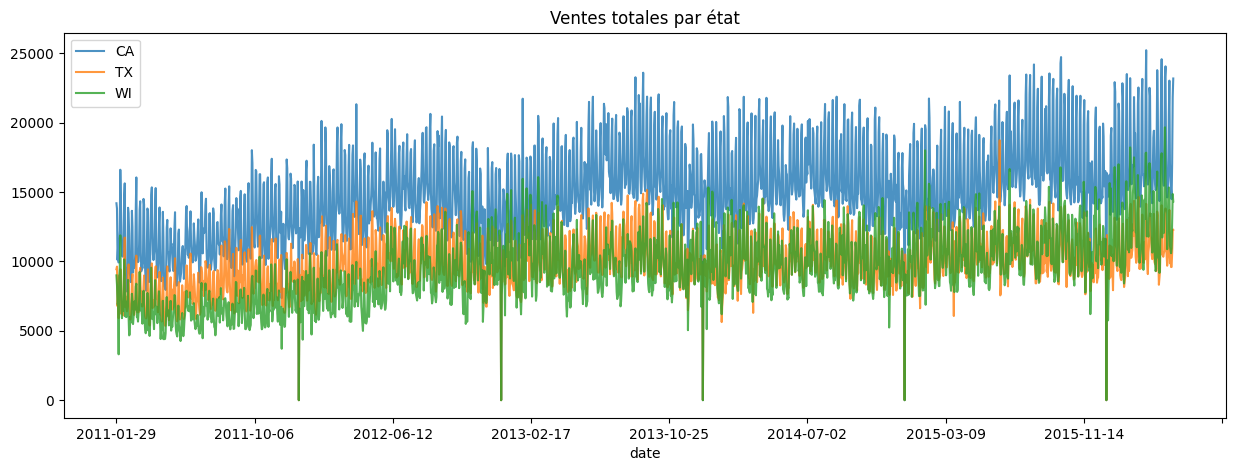

In [7]:
s_state = s_train['state_id'].unique()
for s in s_state:
    state_col = [c for c in past_sales.columns if s in c]
    past_sales[state_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Ventes totales par état')
plt.legend(s_state)
plt.show()

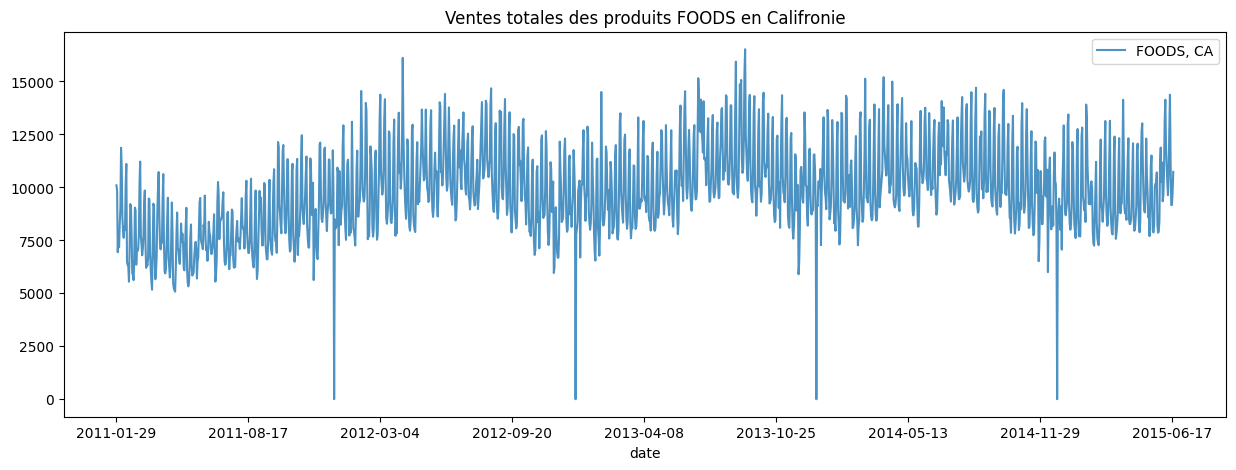

In [8]:
foods_ca = past_sales.loc['2011-01-29':'2015-06-19']

for cat_id in s_train['cat_id'].unique():
    for state_id in s_train['state_id'].unique():
        if cat_id == 'FOODS' and state_id == 'CA':
            items_col = [c for c in past_sales.columns if cat_id in c and state_id in c]
            if items_col:
                total_sales = foods_ca[items_col].sum(axis=1)
                total_sales.plot(figsize=(15, 5),
                                 alpha=0.8,
                                 title='Ventes totales des produits FOODS en Califronie')
plt.legend(['FOODS, CA'])
plt.show()

In [21]:
start_date = '2011-01-29'
end_date = '2015-06-19'

df_fcst = pd.DataFrame(columns=['date', 'state', 'category', 'qty'])

for cat_id in s_train['cat_id'].unique():
    for state_id in s_train['state_id'].unique():
        if cat_id == 'FOODS' and state_id == 'CA':
            items_col = [c for c in past_sales.columns if cat_id in c and state_id in c]
            if items_col:
                total_sales = past_sales[items_col].sum(axis=1)
                
                df = pd.DataFrame({'date': past_sales.index, 'state': [state_id]*len(past_sales.index),
                                   'category': [cat_id]*len(past_sales.index), 'qty': total_sales})
                
                df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]  # Filtering by date range
                
                df_fcst = pd.concat([df_fcst, df], ignore_index=True)

df_fcst = df_fcst.sort_values(by='date')

print(df_fcst)


            date state category    qty
0     2011-01-29    CA    FOODS  10101
1     2011-01-30    CA    FOODS   9862
2     2011-01-31    CA    FOODS   6944
3     2011-02-01    CA    FOODS   7864
4     2011-02-02    CA    FOODS   7178
...          ...   ...      ...    ...
1598  2015-06-15    CA    FOODS  11107
1599  2015-06-16    CA    FOODS   9165
1600  2015-06-17    CA    FOODS   9180
1601  2015-06-18    CA    FOODS   9781
1602  2015-06-19    CA    FOODS  10734

[1603 rows x 4 columns]


In [12]:
pip install lightgbm

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 3.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.3 MB 3.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 3.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.3 MB 4.8 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.3 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.9 MB 4.1 MB/s eta 0:00:12
   ---------------------------------------- 0.5/45.9 MB 5.1 MB/s eta 0:00:09
    -------------------

In [14]:
pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [16]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.3/10.6 MB 4.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.6 MB 4.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.6 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 4.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 4.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.6 MB 5.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.6 MB 5.8 MB/s eta 0:00:02
   ------------ --------------------------- 3.3/10.6 MB 6.1 MB/s eta 0:00:02
   ---

In [19]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_fcst['qty'] = pd.to_numeric(df_fcst['qty'])

X = df_fcst[['state', 'category']]
y = df_fcst['qty']

X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the LightGBM model and set hyperparameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'early_stopping_round': 10  # Set early stopping rounds here
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Train the LightGBM model
gbm = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Predict on the testing data
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.


LightGBMError: Forced splits file includes feature index 0, but maximum feature index in dataset is -1

In [ ]:
#commit